In [5]:
import pandas as pd
import os
import matplotlib.pyplot as plt
Location = 'Oosterhout'
ObsHeads = pd.read_csv(os.path.join('..','Data','dawaco',f'stijghoogtereeksen_WG_{Location}.csv'), index_col= 'datumtijd')
ObsHeads = ObsHeads.set_index(pd.to_datetime(ObsHeads.index))
Dis = pd.read_csv(os.path.join('..','Data','pidata',f'pidata_WG_{Location}.csv'))
Dis['Time'] = pd.to_datetime(Dis['datumtijd'], utc =True)
Dis.set_index(['Time'], inplace = True)
Dis.index = Dis.index.tz_convert(None)
Dis = Dis.pivot(columns = 'putcode', values = 'debietmeter')
Dis = Dis.resample('D').sum()
Dis = Dis.mean(axis = 1)
ts = ObsHeads

ra = ts.rolling(30,center = True).mean()

fig, ax = plt.subplots(3, dpi = 500)
ts.plot(ax = ax[0])
# ra.plot(ax = ax[0])
filtered = ts - ra + ra.mean()
filtered.plot(ax = ax[1])
Dis.plot(ax =ax[2])
fig.tight_layout()

C:\Users\leermdv\AppData\Local\Temp\ipykernel_26504\1173158773.py:5: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  ObsHeads = pd.read_csv(os.path.join('..','Data','dawaco',f'stijghoogtereeksen_WG_{Location}.csv'), index_col= 'datumtijd')


DataError: Cannot aggregate non-numeric type: object

<Axes: xlabel='Time'>

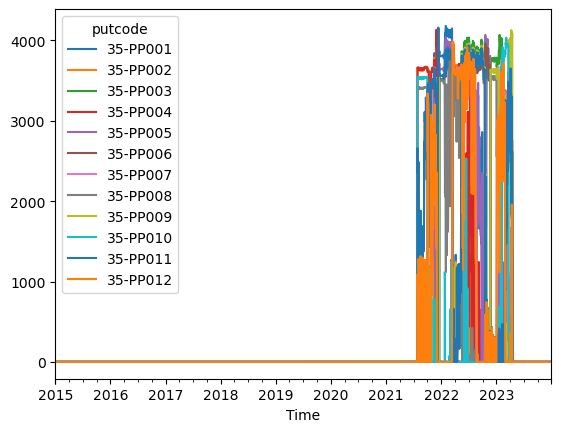

In [12]:
import pandas as pd
def FixTS_Discharge(TS):
        TS['Time'] = pd.to_datetime(TS['datumtijd'], utc =True)
        TS.set_index(['Time'], inplace = True)
        TS.index = TS.index.tz_convert(None)
        TS = TS.pivot(columns = 'putcode', values = 'debietmeter')
        
        TS = TS.resample('D').sum()       
        return TS
df = pd.read_csv(r"C:\Users\leermdv\OneDrive - TNO\Documents\Python Scripts\ExtractionCalibrator\Data\pidata\pidata_WG_Schijf.csv")
df = FixTS_Discharge(df)
df.plot()